In [58]:
import numpy as np
import matplotlib.pyplot as plt

from correctness import *

path, file1, file2 determine the runs being compared

In [59]:
path = "../particle-sim/data/"

In [60]:
file1 = "2024-05-01_16-22-25_GPU_21.txt"
file2 = "2024-05-01_16-22-25_GPU_21.txt"

In [61]:
header1, data1 = read_file(path + file1)
header2, data2 = read_file(path + file2)

data1 = data1.to_numpy()
data2 = data2.to_numpy()

display(header1)
display(header2)

name,particles,iterations,timing,doubleBuffer,device
value,500,100,3675,0,CPU


name,particles,iterations,timing,doubleBuffer,device
value,500,100,716.13,0,GPU


In [62]:
compare_positions(data1.shape[0], data1, data2)

(True, [])

In [63]:
data1

array([[-1650000., -1199960.,  1738010.,  2000000.],
       [-1967960.,  1287970.,  1618060.,  2000000.],
       [  942000.,   198094., -1327960.,  2000000.],
       ...,
       [-1376000.,  1624000., -1414000.,  2000000.],
       [  816000., -1190000., -1434000.,  2000000.],
       [ -684000.,  1768000., -1486000.,  2000000.]])

In [64]:
data2

array([[-1650000., -1199960.,  1738010.,  2000000.],
       [-1967960.,  1287970.,  1618060.,  2000000.],
       [  942000.,   198094., -1327960.,  2000000.],
       ...,
       [-1376000.,  1624000., -1414000.,  2000000.],
       [  816000., -1190000., -1434000.,  2000000.],
       [ -684000.,  1768000., -1486000.,  2000000.]])

# Timings

Given an id number, this assumes that all trials with same ID are identical except for number of particles in the simulation. 

Question: Does scaling the problem size matter? YES!

Tests: 500 particles 20000 bb
       1000 particles 40000 bb
       5000 particles 200000 bb
       CPU stops here (took 30 minutes at this point for 500 ts.)
       10000 particles 400000 bb
       20000 particles 800000 bb
       30000 particles 1200000 bb
       40000 particles 1600000 bb
       50000 particles 2000000 bb
       75000 particles 3000000 bb
       100000 particles 4000000 bb

ID 11: CPU default
ID 12: GPU naive
ID 13: GPU double-buffered
ID 14: GPU ordered-particles
ID 15: CPU ordered-particles







In [65]:
numParticles = [500, 1000, 5000, 10000, 20000, 30000, 40000, 50000, 75000, 100000]
sizes = []
for i in range(len(numParticles)):
    if numParticles[i] == 500:
        sizes.append(20000)
    else:
        sizes.append(int(np.ceil((numParticles[i] / 500 * (20000**3))**(1/3))))
sizes

[20000, 25199, 43089, 54289, 68400, 78298, 86178, 92832, 106266, 116961]

In [66]:
id11, finalPos11 = get_timing(11, path)
id12, finalPos12 = get_timing(18, path)
id13, finalPos13 = get_timing(19, path)
id14, finalPos14 = get_timing(17, path)
id15, finalPos15 = get_timing(15, path)

In [67]:
#for key in [500, 1000, 5000, 10000, 50000, 10000]:
for key in [500, 1000, 5000]:
    dataset = []
    if key in finalPos11:
        dataset.append(finalPos11[key])
    if key in finalPos12:
        dataset.append(finalPos12[key])
    if key in finalPos13:
        dataset.append(finalPos13[key])
    if key in finalPos14:
        dataset.append(finalPos14[key])
    if key in finalPos15:
        dataset.append(finalPos15[key])
    val, counters = compare_positions(key, dataset[3].to_numpy(), dataset[4].to_numpy())
    #print(val)
    val1, counters = compare_positions(key, dataset[0].to_numpy(), dataset[1].to_numpy())
    val2, counters = compare_positions(key, dataset[1].to_numpy(), dataset[2].to_numpy())
    #print(val1 and val2)

        

In [68]:
id14

,particles,timing
0,500,6.829580
1,1000,11.741700
2,5000,64.435600
3,10000,118.836400
4,20000,241.254000
5,30000,360.562667
6,40000,653.914000
7,50000,826.433333
8,75000,886.459000
9,100000,1201.430000


Text(0, 0.5, 'Time per iteration (ms)')

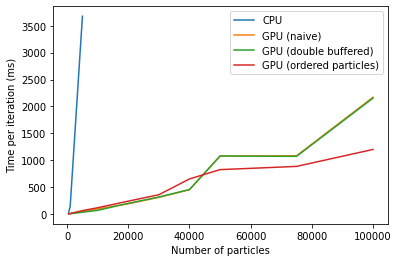

In [69]:
plt.plot(id11["particles"], id11["timing"])
plt.plot(id12["particles"], id12["timing"])
plt.plot(id13["particles"], id13["timing"])
plt.plot(id14["particles"], id14["timing"])
plt.legend(["CPU", "GPU (naive)", "GPU (double buffered)", "GPU (ordered particles)"])
plt.xlabel("Number of particles")
plt.ylabel("Time per iteration (ms)")